In [3]:
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy.random as npr
import re
from numba import jit
import scipy.stats
import scipy.special

In [4]:
def hpd(trace, mass_frac):
    d = np.sort(np.copy(trace))
    n = len(trace)
    n_samples = np.floor(mass_frac * n).astype(int)
    int_width = d[n_samples:] - d[:n-n_samples]
    min_int = np.argmin(int_width)
    return np.array([d[min_int], d[min_int+n_samples]])

# ran slower calculations on Savio

In [5]:
res_unif = pd.read_csv('results_uniform.txt', sep='\t', names=['ll', 'f', 'n1', 'n2'])
num_chains = 100
num_iterations = int(res_unif.shape[0] / num_chains)
iterations = np.repeat(np.arange(num_iterations), num_chains)
chains = np.tile(np.arange(num_chains), num_iterations)
iterations[-5:], chains[-5:]
res_unif['iter'] = iterations
res_unif['chain'] = chains
res_unif.set_index(['iter', 'chain'], inplace=True)
res_unif.head(3)

ll         f          n1          n2
iter chain                                            
0    0      4.262022  0.723417  287.577004  285.248187
     1      4.660929  0.291770  331.706663  142.614655
     2      4.868206  0.972288  327.748132  150.564370

In [6]:
res_logunif = pd.read_csv('results_loguniform.txt', sep='\t', names=['ll', 'f', 'n1', 'n2'])
num_chains = 100
num_iterations = int(res_logunif.shape[0] / num_chains)
iterations = np.repeat(np.arange(num_iterations), num_chains)
chains = np.tile(np.arange(num_chains), num_iterations)
iterations[-5:], chains[-5:]
res_logunif['iter'] = iterations
res_logunif['chain'] = chains
res_logunif.set_index(['iter', 'chain'], inplace=True)
res_logunif.head(3)

ll         f          n1          n2
iter chain                                            
0    0      5.169693  0.958573  344.775436  108.066459
     1      5.719034  0.886827  283.746848   63.149862
     2      3.572210  0.279281  336.430002  371.097674

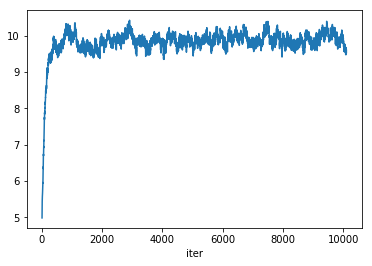

In [9]:
res_unif.groupby(level=0)['ll'].mean().plot()

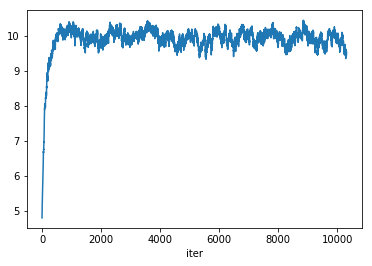

In [10]:
res_logunif.groupby(level=0)['ll'].mean().plot()

In [11]:
burnin_iters = 2000
res_unif = res_unif.reset_index().query('iter >= 2000').set_index(['iter', 'chain'])
res_logunif = res_logunif.reset_index().query('iter >= 2000').set_index(['iter', 'chain'])

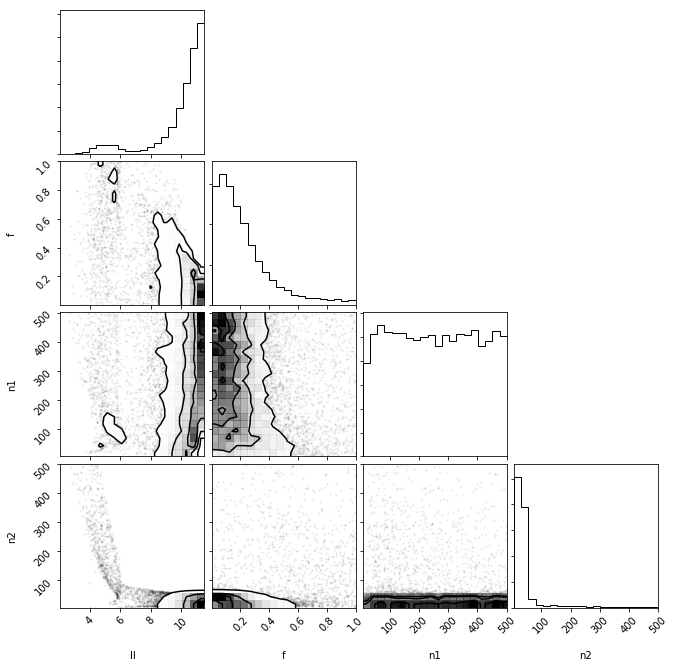

In [12]:
import corner
corner.corner(res_logunif.sample(10000));

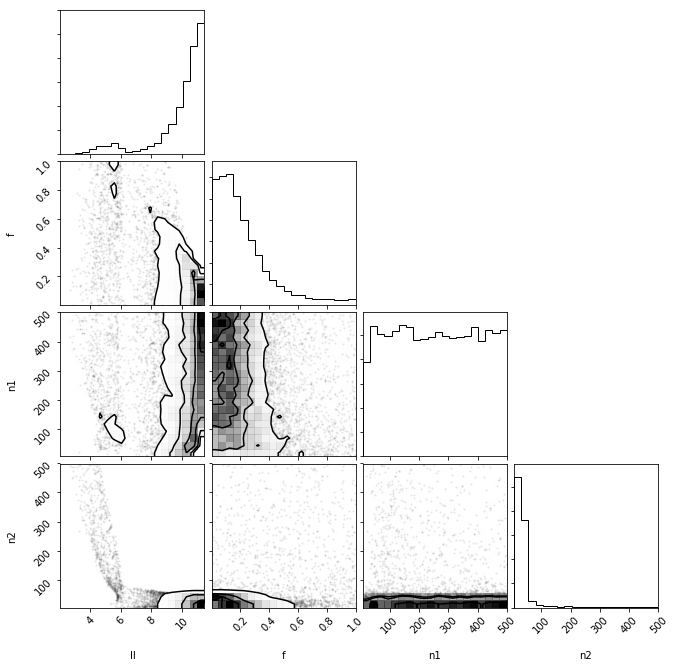

In [13]:
import corner
corner.corner(res_unif.sample(10000));

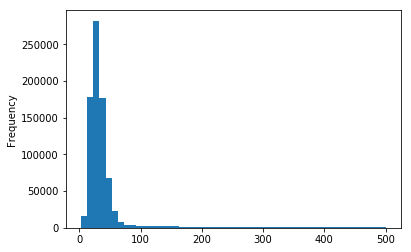

In [14]:
res_unif['n2'].plot.hist(bins=50)

In [15]:
print 'uniform credible intervals'
print 'f', hpd(res_unif['f'], 0.95)
print 'n1', hpd(res_unif['n1'], 0.95)
print 'n2', hpd(res_unif['n2'], 0.95)

uniform credible intervals
f [7.47609955e-07 6.62770084e-01]
n1 [ 34.52761735 498.03445595]
n2 [  6.99226489 140.95152827]


In [16]:
print 'loguniform credible intervals'
print 'f', hpd(res_logunif['f'], 0.95)
print 'n1', hpd(res_logunif['n1'], 0.95)
print 'n2', hpd(res_logunif['n2'], 0.95)

loguniform credible intervals
f [4.12557530e-06 6.73712521e-01]
n1 [ 29.56011057 495.08821556]
n2 [  7.01197544 135.44354388]


In [19]:
print 'loguniform median estimates'
print 'f', res_logunif['f'].median()
print 'n1', res_logunif['n1'].median()
print 'n2', res_logunif['n2'].median()

loguniform median estimates
f 0.167202389813
n1 251.361458737
n2 30.1124969315


In [20]:
print 'uniform median estimates'
print 'f', res_unif['f'].median()
print 'n1', res_unif['n1'].median()
print 'n2', res_unif['n2'].median()

uniform median estimates
f 0.167194202813
n1 252.040689344
n2 30.2698418298
